# Trabajar y procesar datos sismológicos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import obspy
from obspy.core import read

## Filtrado de sismogramas

In [2]:
st = read("https://examples.obspy.org/RJOB_061005_072159.ehz.new")

In [3]:
tr = st[0]

In [4]:
tr_filtrada = tr.copy() #Copia para no dañar la original

In [5]:
tr_filtrada_2 = tr.copy()

In [6]:
tr_filtrada.filter('lowpass', freq=1.0, corners=2, zerophase=True)

.RJOB..Z | 2005-10-06T07:21:59.850000Z - 2005-10-06T07:24:59.845000Z | 200.0 Hz, 36000 samples

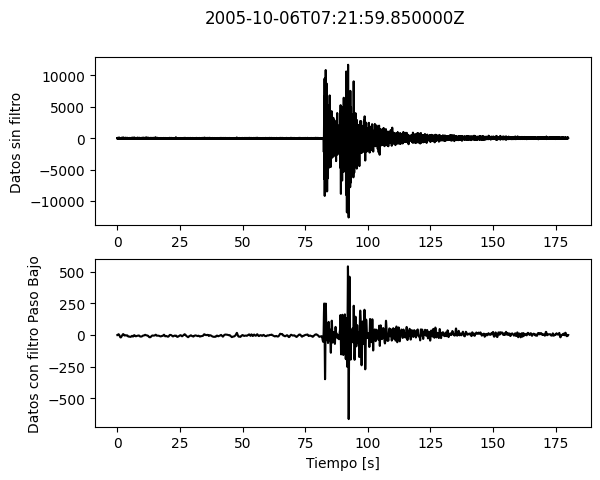

In [7]:
t = np.arange(0, tr.stats.npts / tr.stats.sampling_rate, tr.stats.delta)
plt.subplot(211)
plt.plot(t, tr.data, 'k')
plt.ylabel('Datos sin filtro')
plt.subplot(212)
plt.plot(t, tr_filtrada.data, 'k')
plt.ylabel('Datos con filtro Paso Bajo')
plt.xlabel('Tiempo [s]')
plt.suptitle(tr.stats.starttime)
plt.show()

In [8]:
tr_filtrada_2.filter("highpass", freq=1.0, corners=2, zerophase=True)

.RJOB..Z | 2005-10-06T07:21:59.850000Z - 2005-10-06T07:24:59.845000Z | 200.0 Hz, 36000 samples

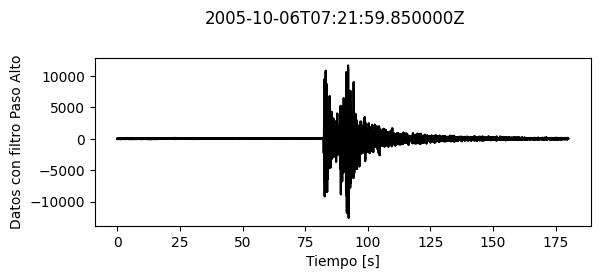

In [9]:
t = np.arange(0, tr.stats.npts / tr.stats.sampling_rate, tr.stats.delta)
plt.subplot(211)
plt.plot(t, tr.data, 'k')
plt.ylabel('Datos sin filtro')
plt.plot(213)
plt.plot(t, tr_filtrada_2.data, 'k')
plt.ylabel('Datos con filtro Paso Alto')
plt.xlabel('Tiempo [s]')
plt.suptitle(tr.stats.starttime)
plt.show()

In [10]:
st = read("https://examples.obspy.org/RJOB_061005_072159.ehz.new")

In [11]:
tr = st[0]

In [12]:
tr_new = tr.copy()

In [13]:
tr_new.decimate(factor=4, strict_length=False)

.RJOB..Z | 2005-10-06T07:21:59.850000Z - 2005-10-06T07:24:59.830000Z | 50.0 Hz, 9000 samples

In [14]:
tr_filtrada_3 = tr.copy()

In [15]:
tr_filtrada_3.filter('lowpass', freq=0.4 * tr.stats.sampling_rate/4)

.RJOB..Z | 2005-10-06T07:21:59.850000Z - 2005-10-06T07:24:59.845000Z | 200.0 Hz, 36000 samples

In [16]:
t = np.arange(0, tr.stats.npts / tr.stats.sampling_rate, tr.stats.delta)
t_new = np.arange(0, tr_new.stats.npts / tr_new.stats.sampling_rate, tr_new.stats.delta)

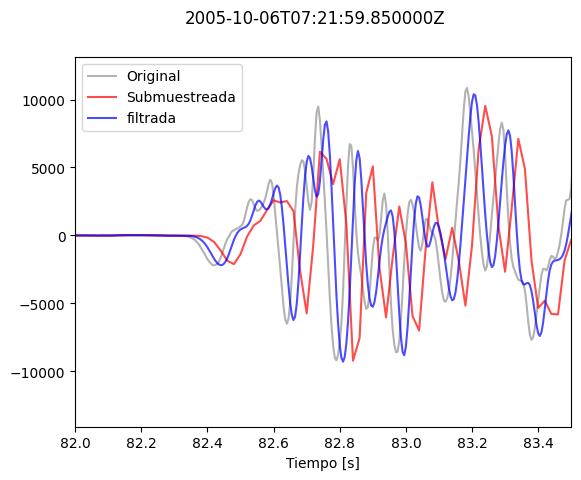

In [17]:
plt.plot(t, tr.data, 'k', label='Original', alpha=0.3) #EL alfa de ese valor le da transparencia.
plt.plot(t_new, tr_new.data, 'r', label='Submuestreada', alpha=0.7)
plt.plot(t, tr_filtrada_3.data, 'b', label='filtrada', alpha=0.7)

plt.xlabel('Tiempo [s]')
plt.xlim(82, 83.5) #Para que se vea amplia.
plt.suptitle(tr.stats.starttime)
plt.legend()
plt.show()
#EL submuestreo sirve cuando es muy densa la interpretación, queda más liviano pero pierde resolución.

## Ejemplo avanzado: Análisis F-K

In [18]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import obspy
from obspy.core.util import AttribDict
from obspy.imaging.cm import obspy_sequential
from obspy.signal.invsim import corn_freq_2_paz
from obspy.signal.array_analysis import array_processing

In [19]:
st = obspy.read("https://examples.obspy.org/agfa.mseed")

In [20]:
st[0].stats.paz = AttribDict({
    'poles': [(-0.03736 - 0.03617j), (-0.03736 + 0.03617j)],
    'zeros': [0j, 0j],
    'sensitivity': 205479446.68601453,
    'gain': 1.0})
st[0].stats.coordinates = AttribDict({
    'latitude': 48.108589,
    'elevation': 0.450000,
    'longitude': 11.582967})

st[1].stats.paz = AttribDict({
    'poles': [(-0.03736 - 0.03617j), (-0.03736 + 0.03617j)],
    'zeros': [0j, 0j],
    'sensitivity': 205479446.68601453,
    'gain': 1.0})
st[1].stats.coordinates = AttribDict({
    'latitude': 48.108192,
    'elevation': 0.450000,
    'longitude': 11.583120})

st[2].stats.paz = AttribDict({
    'poles': [(-0.03736 - 0.03617j), (-0.03736 + 0.03617j)],
    'zeros': [0j, 0j],
    'sensitivity': 250000000.0,
    'gain': 1.0})
st[2].stats.coordinates = AttribDict({
    'latitude': 48.108692,
    'elevation': 0.450000,
    'longitude': 11.583414})

st[3].stats.paz = AttribDict({
    'poles': [(-4.39823 + 4.48709j), (-4.39823 - 4.48709j)],
    'zeros': [0j, 0j],
    'sensitivity': 222222228.10910088,
    'gain': 1.0})
st[3].stats.coordinates = AttribDict({
    'latitude': 48.108456,
    'elevation': 0.450000,
    'longitude': 11.583049})

st[4].stats.paz = AttribDict({
    'poles': [(-4.39823 + 4.48709j), (-4.39823 - 4.48709j), (-2.105 + 0j)],
    'zeros': [0j, 0j, 0j],
    'sensitivity': 222222228.10910088,
    'gain': 1.0})
st[4].stats.coordinates = AttribDict({
    'latitude': 48.108730,
    'elevation': 0.450000,
    'longitude': 11.583157})

In [21]:
paz1hz = corn_freq_2_paz(1.0, damp=0.707)

In [22]:
st.simulate(paz_remove='self', paz_simulate=paz1hz)

5 Trace(s) in Stream:
.BW01..ZH | 2008-02-17T11:04:58.884998Z - 2008-02-17T11:06:01.414998Z | 200.0 Hz, 12507 samples
.BW02..ZH | 2008-02-17T11:04:58.884998Z - 2008-02-17T11:06:01.414998Z | 200.0 Hz, 12507 samples
.BW03..ZH | 2008-02-17T11:04:58.884998Z - 2008-02-17T11:06:01.414998Z | 200.0 Hz, 12507 samples
.BW07..ZH | 2008-02-17T11:04:58.884998Z - 2008-02-17T11:06:01.414998Z | 200.0 Hz, 12507 samples
.BW08..ZH | 2008-02-17T11:04:58.884998Z - 2008-02-17T11:06:01.414998Z | 200.0 Hz, 12507 samples

In [23]:
stime = obspy.UTCDateTime("20080217110515")
etime = obspy.UTCDateTime("20080217110545")
kwargs = dict(
    # slowness grid: X min, X max, Y min, Y max, Slow Step
    sll_x=-3.0, slm_x=3.0, sll_y=-3.0, slm_y=3.0, sl_s=0.03,
    # sliding window properties
    win_len=1.0, win_frac=0.05,
    # frequency properties
    frqlow=1.0, frqhigh=8.0, prewhiten=0,
    # restrict output
    semb_thres=-1e9, vel_thres=-1e9, timestamp='mlabday',
    stime=stime, etime=etime
)
out = array_processing(st, **kwargs)

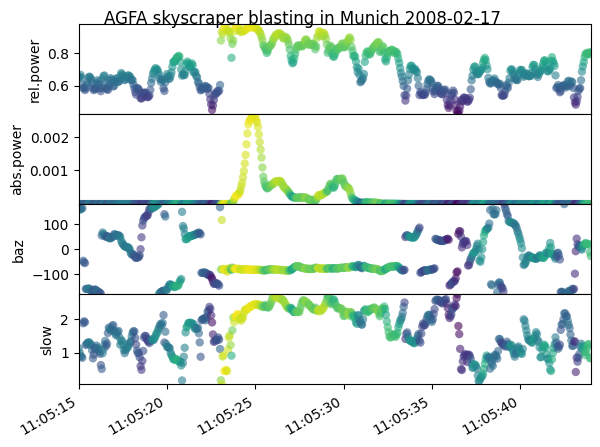

In [24]:
labels = ['rel.power', 'abs.power', 'baz', 'slow']

xlocator = mdates.AutoDateLocator()
fig = plt.figure()
for i, lab in enumerate(labels):
    ax = fig.add_subplot(4, 1, i + 1)
    ax.scatter(out[:, 0], out[:, i + 1], c=out[:, 1], alpha=0.6,
               edgecolors='none', cmap=obspy_sequential)
    ax.set_ylabel(lab)
    ax.set_xlim(out[0, 0], out[-1, 0])
    ax.set_ylim(out[:, i + 1].min(), out[:, i + 1].max())
    ax.xaxis.set_major_locator(xlocator)
    ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(xlocator))

fig.suptitle('AGFA skyscraper blasting in Munich %s' % (
    stime.strftime('%Y-%m-%d'), ))
fig.autofmt_xdate()
fig.subplots_adjust(left=0.15, top=0.95, right=0.95, bottom=0.2, hspace=0)
plt.show()
#Estudiar características de la propagación de ondas.
#Es básicamente una transformada de Furer.